In [1]:
%matplotlib inline
import pandas as pd
from plotnine import *

# Heatmaps and Melting

In [2]:
df = pd.read_csv("data/flights_full.csv")

In [3]:
df

,month,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
0,January,112,115,145,171,196,204,242,284,315,340,360,417
1,February,118,126,150,180,196,188,233,277,301,318,342,391
2,March,132,141,178,193,236,235,267,317,356,362,406,419
3,April,129,135,163,181,235,227,269,313,348,348,396,461
4,May,121,125,172,183,229,234,270,318,355,363,420,472
5,June,135,149,178,218,243,264,315,374,422,435,472,535
6,July,148,170,199,230,264,302,364,413,465,491,548,622
7,August,148,170,199,242,272,293,347,405,467,505,559,606
8,September,136,158,184,209,237,259,312,355,404,404,463,508
9,October,119,133,162,191,211,229,274,306,347,359,407,461


In [8]:
features = df.columns[1:]
df_melted = pd.melt(df, id_vars=["month"], value_vars=features, value_name="passengers", var_name="year")

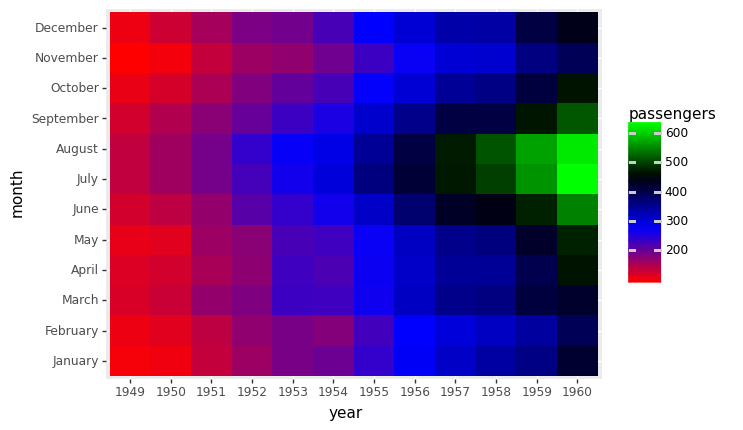

<ggplot: (8790238865342)>

In [72]:
ggplot(df_melted, aes(x="year", y="month", fill="passengers")) \
+ geom_tile() \
+ scale_fill_gradientn(colors=["#ff0000", "#0000ff", "#000000", "#00ff00"])

In [12]:
df_melted.dtypes

month         category
year            object
passengers       int64
dtype: object

In [11]:
df_melted["month"] = pd.Categorical(df_melted["month"], df_melted["month"].unique())

In [14]:
df_melted["month"].unique()

['January', 'February', 'March', 'April', 'May', ..., 'August', 'September', 'October', 'November', 'December']
Length: 12
Categories (12, object): ['January', 'February', 'March', 'April', ..., 'September', 'October', 'November', 'December']

# Clustering With k-means

In [62]:
demodf = pd.DataFrame({"cheese":[2.5, 1.5, 2, 4, 4, 4.5, 3.5],
                      "beer":[1, 2, 3, 6, 4, 5, 5]})

In [40]:
demodf

,cheese,beer
0,2.5,1
1,1.5,2
2,2.0,3
3,4.0,6
4,4.0,4
5,4.5,5
6,3.5,5


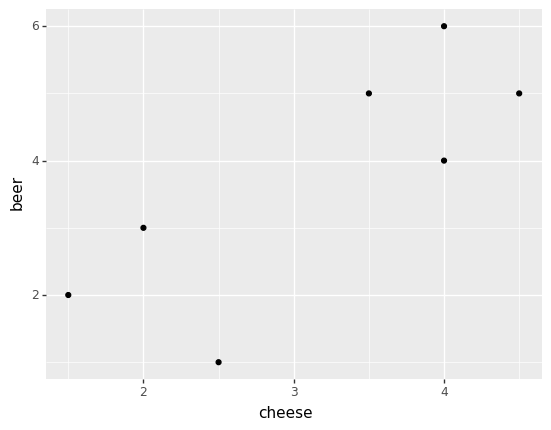

<ggplot: (8790237845508)>

In [18]:
ggplot(demodf, aes(x = "cheese", y="beer")) \
+ geom_point()

### k-means clustering

* Pick k value, how many clusters you want
* choose k points from the data randomly to be you starting points
    * called centroids
* while it's worth it to keep searching
    * determine the centroid closest to each point
        * this determines the cluster of the centroid
    * recalculate the centroids based on the clusters


In [19]:
from sklearn.cluster import KMeans

In [51]:
km = KMeans(n_clusters = 2, init="random",
           n_init = 10, max_iter=300,
           tol=1e-04, random_state=0)

In [53]:
x = demodf.values

In [54]:
x

array([[2.5, 1. ],
       [1.5, 2. ],
       [2. , 3. ],
       [4. , 6. ],
       [4. , 4. ],
       [4.5, 5. ],
       [3.5, 5. ]])

In [55]:
result = km.fit(x)

In [56]:
result.cluster_centers_

array([[2., 2.],
       [4., 5.]])

In [57]:
result.labels_

array([0, 0, 0, 1, 1, 1, 1], dtype=int32)

In [58]:
demodf["cluster"] = pd.Series(result.labels_).astype("str")

In [59]:
demodf

,cheese,beer,cluster
0,2.5,1,0
1,1.5,2,0
2,2.0,3,0
3,4.0,6,1
4,4.0,4,1
5,4.5,5,1
6,3.5,5,1


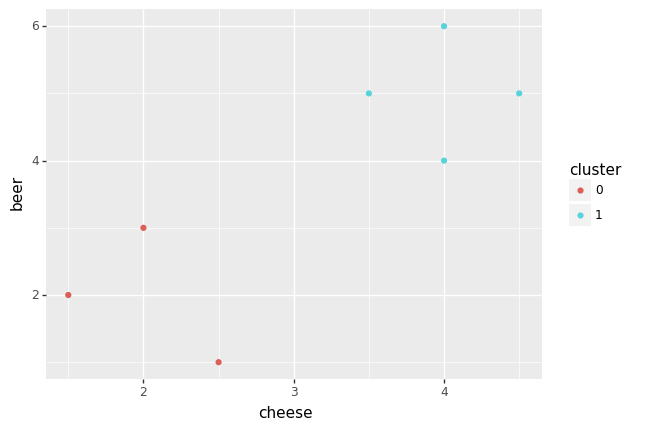

<ggplot: (8790238726687)>

In [60]:
ggplot(demodf, aes(x = "cheese", y="beer", color="cluster")) \
+ geom_point()

In [61]:
result.inertia_

5.0

In [66]:
dist = []
for i in range(1, 8):
    km = KMeans(n_clusters = i, init="random",
           n_init = 10, max_iter=300,
           tol=1e-04, random_state=0)
    result = km.fit(x)
    dist.append(result.inertia_)

In [67]:
idf = pd.DataFrame({"num":range(1, 8),
                   "distortion":dist})

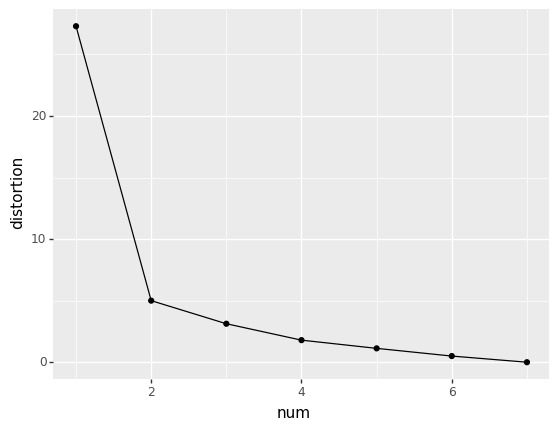

<ggplot: (8790237841321)>

In [68]:
ggplot(idf, aes(x = "num", y="distortion")) \
+ geom_line() \
+ geom_point()